---
## Import packages and libraries
---

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import joblib

from sentiment_analysis.preprocessing import readData
from vectorizer_tfidf import reviewTfidfVectorizer

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report

In [ ]:
sentences = readData("sentiment_analysis/corpus.txt")
len(sentences)

2518

---
## Vectorizer
---

### Uni-gram

In [ ]:
vectorizer = reviewTfidfVectorizer()
vectorizer.fit(sentences)

Tokenized Corpus Successful!
Document Count Successful!
Vocabulary Successful!
Successful!


### Save Uni-gram TF_IDF

In [ ]:
joblib.dump(vectorizer, 'vec_models/review_tfidf_vectorizer.pkl')

['vec_models/review_tfidf_vectorizer.pkl']

---
## Sentiment
---

### Transform Data

In [ ]:
vectorizer = joblib.load('vec_models/review_tfidf_vectorizer.pkl')

In [ ]:
vocabulary = vectorizer.vocabulary_
print("Tổng số từ vựng: ", len(vocabulary))

Tổng số từ vựng:  790


In [ ]:
df_train = pd.read_csv("sentiment_analysis/Train.csv")
X_train = df_train["content"]
y_train = df_train["label"]

df_dev = pd.read_csv("sentiment_analysis/Dev.csv")
X_dev = df_dev["content"]
y_dev = df_dev["label"]

df_test = pd.read_csv("sentiment_analysis/Test.csv")
X_test = df_test["content"]
y_test = df_test["label"]

In [ ]:
x_train_tfidf = vectorizer.transform(X_train.tolist()).toarray()

### MaxEnt (Ridge Regression)

In [ ]:
ridge_classifier = RidgeClassifier()

In [ ]:
# Define the parameter grid for grid search
param_grid = {'alpha':  np.arange(0.1, 1.1, 0.1)}

# Perform grid search
grid_search = GridSearchCV(ridge_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_tfidf, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'alpha': 1.0}


In [ ]:
ridge_classifier = RidgeClassifier(alpha=1.0)
ridge_classifier.fit(x_train_tfidf, y_train)

RidgeClassifier()

In [ ]:
x_dev_tfidf = vectorizer.transform(X_dev.tolist()).toarray()
ridge_predictions = ridge_classifier.predict(x_dev_tfidf)

print("Confusion Matrix:")
print(confusion_matrix(y_dev, ridge_predictions))

ridge_accuracy = accuracy_score(y_dev, ridge_predictions)
ridge_precision = precision_score(y_dev, ridge_predictions, average="weighted")
ridge_recall = recall_score(y_dev, ridge_predictions, average="weighted")
ridge_f1 = f1_score(y_dev, ridge_predictions, average="weighted")

print("Accuracy: ", ridge_accuracy)
print("Precision: ", ridge_precision)
print("Recall: ", ridge_recall)
print("F1-Score: ", ridge_f1)

Confusion Matrix:
[[67 10 16]
 [ 7 48 18]
 [ 8 20 58]]
Accuracy:  0.6865079365079365
Precision:  0.69495346470426
Recall:  0.6865079365079365
F1-Score:  0.689154636579934


In [ ]:
ridge_result = classification_report(y_dev, ridge_predictions)
print(ridge_result)

              precision    recall  f1-score   support

           0       0.82      0.72      0.77        93
           1       0.62      0.66      0.64        73
           2       0.63      0.67      0.65        86

    accuracy                           0.69       252
   macro avg       0.69      0.68      0.68       252
weighted avg       0.69      0.69      0.69       252



<Axes: >

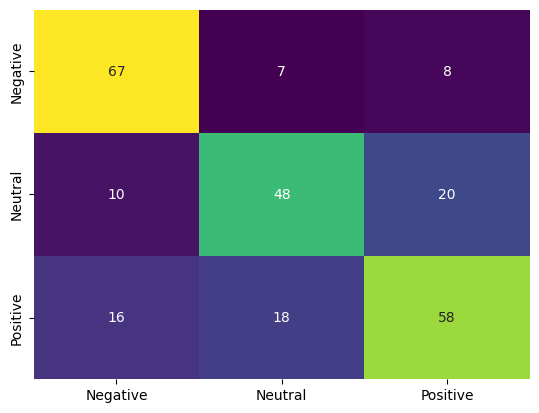

In [ ]:
ridge_conf_matrix = confusion_matrix(ridge_predictions, y_dev)
sns.heatmap(ridge_conf_matrix, annot=True, fmt="d",cmap="viridis", cbar=False,
                 xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])

In [ ]:
result_df_MNB = pd.DataFrame({
    'text': X_dev,
    'true_label': y_dev,
    'predicted_label': ridge_predictions
})
result_df_MNB.head(10)

,text,true_label,predicted_label
0,"Đà giảm của chỉ số này kéo dài cả ngày, chốt p...",0,0
1,"Chốt phiên sáng, VN-Index tăng 3,62 điểm, lên ...",2,2
2,Ngân hàng vì thế cũng là nhóm chịu ảnh hưởng m...,1,2
3,giảm 3 USD/ounce so với thời điểm đóng cửa phi...,0,0
4,lo ngại về đồng USD,0,0
5,quan trọng yếu tố nào tạo nên sự bền vững cho ...,1,1
6,Thị trường có thể sớm bước vào giai đoạn biến ...,2,2
7,giúp cổ phiếu này xếp thứ hai trong danh sách ...,2,2
8,"Trong đó, 9 cá nhân và 7 tổ chức trong nước đã...",1,1
9,"Có thể nói, trong bối cảnh nền kinh tế và doan...",0,0


In [ ]:
example = "Thị trường khởi sắc sau cú trượt dài"
vector = vectorizer.transform([example]).toarray()
result = ridge_classifier.predict(vector)
print("Sentiment: ", result)

Sentiment:  [2]


### SVM

In [ ]:
SVM_classifier = SVC()
SVM_classifier.fit(x_train_tfidf, y_train)

SVC()

In [ ]:
SVM_predictions = SVM_classifier.predict(x_dev_tfidf)

print("Confusion Matrix:")
print(confusion_matrix(y_dev, SVM_predictions))

SVM_accuracy = accuracy_score(y_dev, SVM_predictions)
SVM_precision = precision_score(y_dev, SVM_predictions, average="weighted")
SVM_recall = recall_score(y_dev, SVM_predictions, average="weighted")
SVM_f1 = f1_score(y_dev, SVM_predictions, average="weighted")

print("Accuracy: ", SVM_accuracy)
print("Precision: ", SVM_precision)
print("Recall: ", SVM_recall)
print("F1-Score: ", SVM_f1)

Confusion Matrix:
[[58 21 14]
 [ 4 54 15]
 [ 4 26 56]]
Accuracy:  0.6666666666666666
Precision:  0.7040309493134188
Recall:  0.6666666666666666
F1-Score:  0.6725670111566536


In [ ]:
svm_result = classification_report(y_dev,SVM_predictions)
print(svm_result)

              precision    recall  f1-score   support

           0       0.88      0.62      0.73        93
           1       0.53      0.74      0.62        73
           2       0.66      0.65      0.65        86

    accuracy                           0.67       252
   macro avg       0.69      0.67      0.67       252
weighted avg       0.70      0.67      0.67       252



<Axes: >

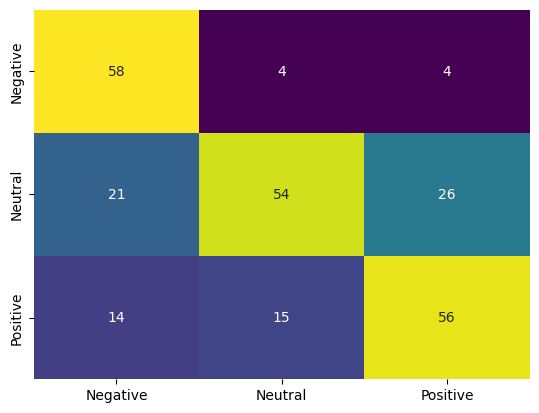

In [ ]:
svm_conf_matrix = confusion_matrix(SVM_predictions, y_dev)
sns.heatmap(svm_conf_matrix, annot=True, fmt="d",cmap="viridis", cbar=False,
                 xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])

In [ ]:
result_df_SVM = pd.DataFrame({
    'text': X_dev,
    'true_label': y_dev,
    'predicted_label': SVM_predictions
})
result_df_SVM.head(10)

,text,true_label,predicted_label
0,"Đà giảm của chỉ số này kéo dài cả ngày, chốt p...",0,0
1,"Chốt phiên sáng, VN-Index tăng 3,62 điểm, lên ...",2,2
2,Ngân hàng vì thế cũng là nhóm chịu ảnh hưởng m...,1,0
3,giảm 3 USD/ounce so với thời điểm đóng cửa phi...,0,0
4,lo ngại về đồng USD,0,0
5,quan trọng yếu tố nào tạo nên sự bền vững cho ...,1,1
6,Thị trường có thể sớm bước vào giai đoạn biến ...,2,2
7,giúp cổ phiếu này xếp thứ hai trong danh sách ...,2,2
8,"Trong đó, 9 cá nhân và 7 tổ chức trong nước đã...",1,1
9,"Có thể nói, trong bối cảnh nền kinh tế và doan...",0,0


In [ ]:
example = "Thị trường giảm đậm sau khi tăng nhiều phiên"
vector = vectorizer.transform([example]).toarray()
result = SVM_classifier.predict(vector)
print("Sentiment: ", result)

Sentiment:  [0]


---
## Save Models
---

In [ ]:
joblib.dump(ridge_classifier, 'ml_models/ridge_model.pkl')

joblib.dump(SVM_classifier, 'ml_models/svm_model.pkl')

['ml_models/svm_model.pkl']

In [ ]:
x_test_tfidf = vectorizer.transform(X_test.tolist()).toarray()

In [ ]:
ridge_model = joblib.load("ml_models/ridge_model.pkl")

ridge_predictions = ridge_model.predict(x_test_tfidf)

print("Confusion Matrix:")
print(confusion_matrix(y_test, ridge_predictions))

ridge_accuracy = accuracy_score(y_test, ridge_predictions)
ridge_precision = precision_score(y_test, ridge_predictions, average="weighted")
ridge_recall = recall_score(y_test, ridge_predictions, average="weighted")
ridge_f1 = f1_score(y_test, ridge_predictions, average="weighted")

print("Accuracy: ", ridge_accuracy)
print("Precision: ", ridge_precision)
print("Recall: ", ridge_recall)
print("F1-Score: ", ridge_f1)

Confusion Matrix:
[[61 12 13]
 [10 46 15]
 [ 5 18 72]]
Accuracy:  0.7103174603174603
Precision:  0.7158730158730158
Recall:  0.7103174603174603
F1-Score:  0.7117248111201249


In [ ]:
svm_model = joblib.load("ml_models/svm_model.pkl")

svm_predictions = svm_model.predict(x_test_tfidf)

print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average="weighted")
svm_recall = recall_score(y_test, svm_predictions, average="weighted")
svm_f1 = f1_score(y_test, svm_predictions, average="weighted")

print("Accuracy: ", svm_accuracy)
print("Precision: ", svm_precision)
print("Recall: ", svm_recall)
print("F1-Score: ", svm_f1)

Confusion Matrix:
[[56 22  8]
 [ 6 55 10]
 [ 3 21 71]]
Accuracy:  0.7222222222222222
Precision:  0.7528800131815496
Recall:  0.7222222222222222
F1-Score:  0.7274456929086599
